In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models.s8 import Net
from utils import build_cifar, Trainer, plot_sampledata, plot_misclassified

# Load Data

In [3]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:01<00:00, 99039320.31it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


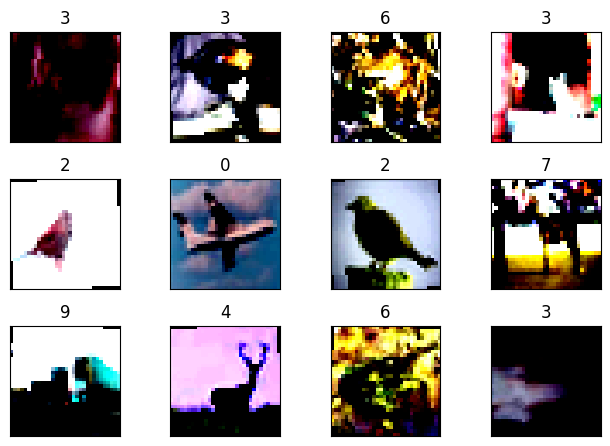

In [4]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(norm="ln").to(device)

In [7]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─GroupNorm: 2-3                    [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [8]:
num_epochs = 20
model = Net(drop=0.025, norm="ln").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.01, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.9098 Batch_id=781 Accuracy=25.67: 100%|██████████| 782/782 [00:50<00:00, 15.61it/s]


Test set: Average loss: 1.8153, Accuracy: 2958/10000 (29.58%)

Epoch 2


Train: Loss=1.5932 Batch_id=781 Accuracy=37.44: 100%|██████████| 782/782 [00:49<00:00, 15.70it/s]


Test set: Average loss: 1.5103, Accuracy: 4462/10000 (44.62%)

Epoch 3


Train: Loss=1.2869 Batch_id=781 Accuracy=44.71: 100%|██████████| 782/782 [00:51<00:00, 15.24it/s]


Test set: Average loss: 1.3066, Accuracy: 5286/10000 (52.86%)

Epoch 4


Train: Loss=1.3155 Batch_id=781 Accuracy=50.66: 100%|██████████| 782/782 [00:50<00:00, 15.59it/s]


Test set: Average loss: 1.2052, Accuracy: 5702/10000 (57.02%)

Epoch 5


Train: Loss=1.3565 Batch_id=781 Accuracy=54.63: 100%|██████████| 782/782 [00:49<00:00, 15.67it/s]


Test set: Average loss: 1.2302, Accuracy: 5648/10000 (56.48%)

Epoch 6


Train: Loss=0.9639 Batch_id=781 Accuracy=57.56: 100%|██████████| 782/782 [00:51<00:00, 15.17it/s]


Test set: Average loss: 1.0861, Accuracy: 6161/10000 (61.61%)

Epoch 7


Train: Loss=0.8996 Batch_id=781 Accuracy=59.63: 100%|██████████| 782/782 [00:50<00:00, 15.50it/s]


Test set: Average loss: 0.9911, Accuracy: 6558/10000 (65.58%)

Epoch 8


Train: Loss=1.0517 Batch_id=781 Accuracy=62.12: 100%|██████████| 782/782 [00:49<00:00, 15.79it/s]


Test set: Average loss: 1.0083, Accuracy: 6441/10000 (64.41%)

Epoch 9


Train: Loss=1.0775 Batch_id=781 Accuracy=63.22: 100%|██████████| 782/782 [00:50<00:00, 15.52it/s]


Test set: Average loss: 0.9436, Accuracy: 6738/10000 (67.38%)

Epoch 10


Train: Loss=1.1703 Batch_id=781 Accuracy=64.20: 100%|██████████| 782/782 [00:50<00:00, 15.62it/s]


Test set: Average loss: 0.9042, Accuracy: 6856/10000 (68.56%)

Epoch 11


Train: Loss=1.3575 Batch_id=781 Accuracy=65.17: 100%|██████████| 782/782 [00:50<00:00, 15.58it/s]


Test set: Average loss: 0.9085, Accuracy: 6857/10000 (68.57%)

Epoch 12


Train: Loss=1.2983 Batch_id=781 Accuracy=66.35: 100%|██████████| 782/782 [00:50<00:00, 15.35it/s]


Test set: Average loss: 0.8726, Accuracy: 6997/10000 (69.97%)

Epoch 13


Train: Loss=0.6871 Batch_id=781 Accuracy=66.94: 100%|██████████| 782/782 [00:49<00:00, 15.77it/s]


Test set: Average loss: 0.8565, Accuracy: 7047/10000 (70.47%)

Epoch 14


Train: Loss=0.6399 Batch_id=781 Accuracy=67.72: 100%|██████████| 782/782 [00:49<00:00, 15.72it/s]


Test set: Average loss: 0.8365, Accuracy: 7089/10000 (70.89%)

Epoch 15


Train: Loss=1.0214 Batch_id=781 Accuracy=68.79: 100%|██████████| 782/782 [00:51<00:00, 15.26it/s]


Test set: Average loss: 0.8077, Accuracy: 7203/10000 (72.03%)

Epoch 16


Train: Loss=0.5878 Batch_id=781 Accuracy=69.42: 100%|██████████| 782/782 [00:49<00:00, 15.68it/s]


Test set: Average loss: 0.8255, Accuracy: 7140/10000 (71.40%)

Epoch 17


Train: Loss=1.1447 Batch_id=781 Accuracy=69.86: 100%|██████████| 782/782 [00:49<00:00, 15.80it/s]


Test set: Average loss: 0.7700, Accuracy: 7370/10000 (73.70%)

Epoch 18


Train: Loss=0.5200 Batch_id=781 Accuracy=70.40: 100%|██████████| 782/782 [00:51<00:00, 15.25it/s]


Test set: Average loss: 0.7486, Accuracy: 7437/10000 (74.37%)

Epoch 19


Train: Loss=0.4656 Batch_id=781 Accuracy=71.03: 100%|██████████| 782/782 [00:49<00:00, 15.77it/s]


Test set: Average loss: 0.7431, Accuracy: 7456/10000 (74.56%)

Epoch 20


Train: Loss=0.5335 Batch_id=781 Accuracy=71.50: 100%|██████████| 782/782 [00:49<00:00, 15.74it/s]


Test set: Average loss: 0.7443, Accuracy: 7440/10000 (74.40%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.50@20		71.50
test	 74.56@19		74.40


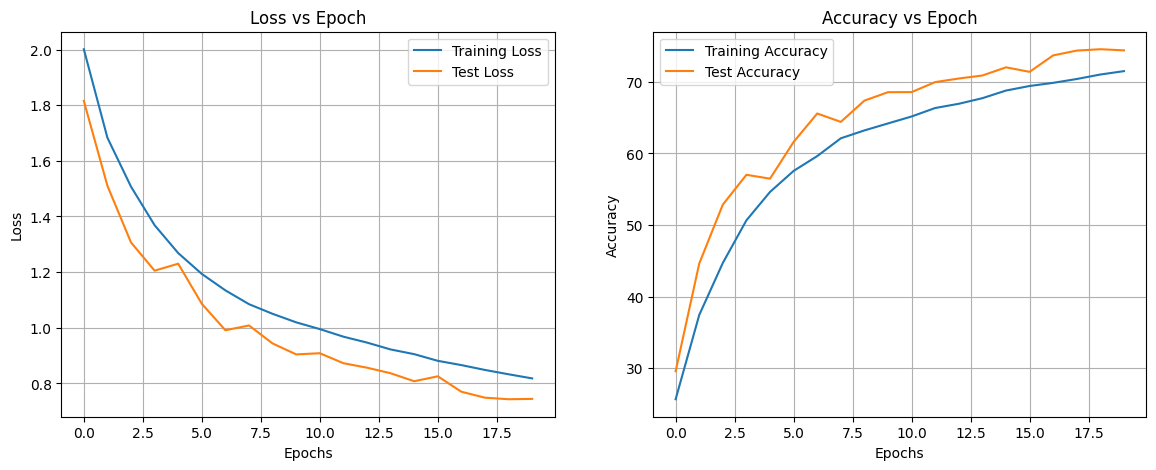

In [9]:
trainer.plot_history()

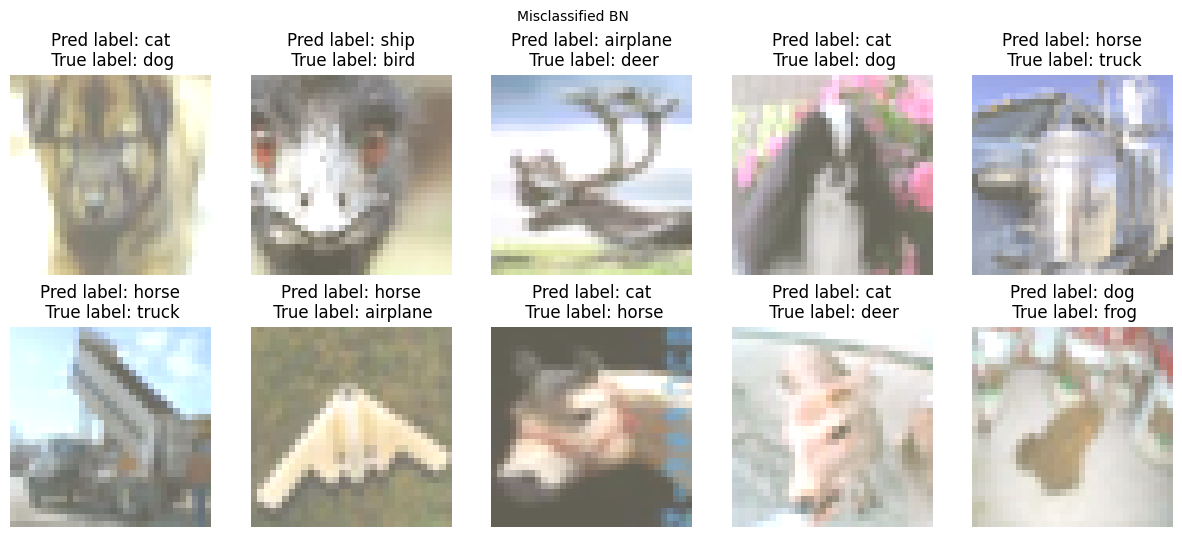

In [10]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)